In [267]:
# load style file
import matplotlib.font_manager
import matplotlib as mpl
import seaborn as sns
mpl.rcParams.update(mpl.rcParamsDefault)
import phd_plot_style
pub_fig_style = phd_plot_style.phd_revtex_plots()

# magic commands
'''
%matplotlib inline
%config InlineBackend.print_figure_kwargs
%config InlineBackend.print_figure_kwargs={'bbox_inches':None, 'dpi': 200}
'''

# Colors
cBlues = sns.color_palette("Blues_r", n_colors=7)#[::3]
cOranges = sns.color_palette("Oranges_r", n_colors=7)#[::3]#[1:-1]
cGreens = sns.color_palette("Greens_r", n_colors=7)#[::3]#[1:-1]
cPurples = sns.color_palette("Purples_r", n_colors=7)#[::3]#[1:-1]
cGreys = sns.color_palette("PuRd_r", n_colors=7)#[::3]#[1:-1]
color_zip = [cPurples, cBlues, cOranges, cGreens, cGreys]

# define dimensions
fig_width  = pub_fig_style.revtex_sizes_active["page.columnwidth"] * pub_fig_style.tex_pt_to_inch
fig_height = pub_fig_style._get_revtex_rc()["figure.figsize"][1]
print(fig_width, fig_height)

import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os


3.4039020340390205 2.1037271514110163


In [8]:
### Fig 2:
def file_reader(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['N_ls']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0

In [21]:
repeat = 25
Nl = 5
#7q_new_eta1
f2 = "pauli/7q_loss/" + "even_Nl_%d" % (Nl)
succ_prob, p_list, Ntot = file_reader(f2,repeat)

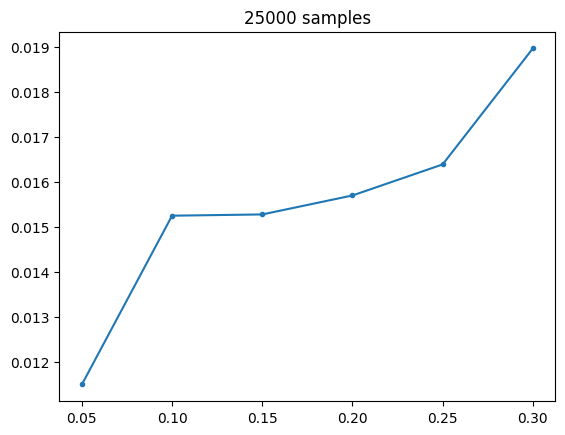

In [24]:
plt.plot(p_list, 1-succ_prob,'.-')
plt.title('25000 samples')
plt.savefig("logicalerror.pdf")

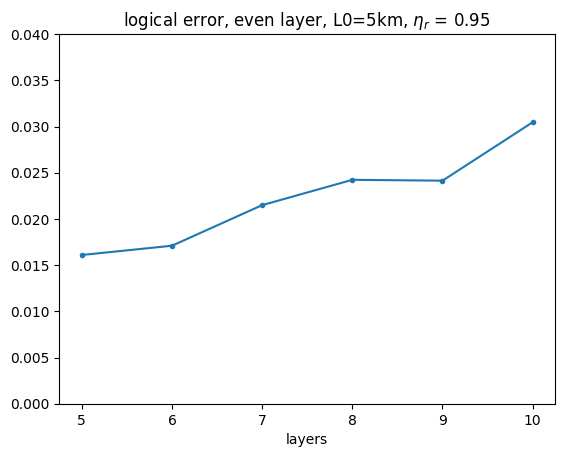

In [51]:
repeat = 20
Nl_list = [5,6,7,8,9,10]
log_err = []
for Nl in Nl_list:
    f2 = "pauli/7q_layers_L5/" + "even_Nl_%d" % (Nl)
    succ_prob, p_list, Ntot = file_reader(f2,repeat)
    log_err.append(succ_prob[0])
    
plt.plot(Nl_list, 1-np.array(log_err),'.-')
plt.ylim([0.0,0.04])
plt.xlabel('layers')
#plt.title('logical error, 20000 samples, 5% loss')
plt.title('logical error, even layer, L0=5km, $\eta_r$ = 0.95')
plt.savefig("logicalerrorVSlayers_L5.pdf")

# 7q draft plot

In [361]:
repeat = 100
#Nl_list = [5,6,7,8,9,10]
Nl_list = [5,6,8,10,12,15,16,18,20,25,30,40]
N_sample_tot = [100000]*12
log_err = []
log_err_err = []
p_r = 0.00
#7q_new_eta1
for Nl in Nl_list:
    f2 = "pauli/7q_new_eta1/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob, p_list, Ntot = file_reader(f2,repeat)
    print(1-succ_prob)
    log_err.append(succ_prob[0])
    log_err_err1 = np.sqrt(log_err1*(1-log_err1)/N_sample_tot[i])
    log_err_err.append(log_err_err1)
    #print(log_err_err1)
m,b = np.polyfit(Nl_list, np.log(np.array(log_err)), 1)


[0.01377134]
[0.01566519]
[0.02093431]
[0.02480466]
[0.02988063]
[0.03675086]
[0.03850937]
[0.04269592]
[0.04690646]
[0.05882866]
[0.06877654]
[0.08657081]


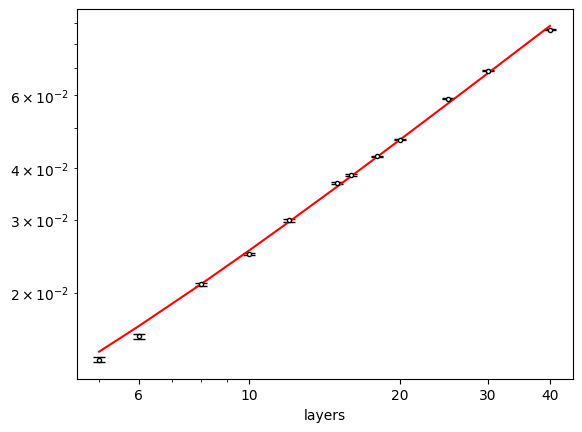

In [347]:
#fig = plt.figure(figsize = (fig_width, fig_height))
#with mpl.rc_context(pub_fig_style._get_revtex_rc()):
#plt.plot(Nl_list, 1-np.array(log_err),'.-')
markersize_value = 6
plt.errorbar(Nl_list, 1-np.array(log_err), yerr = log_err_err, color = 'k', markerfacecolor='white',marker='.',markersize=markersize_value,linestyle='none',capsize=4)
plt.plot(Nl_list, 1-np.exp(m*np.array(Nl_list) + b), 'r-')
plt.xlabel('layers')
    #plt.title('7q code logical error, odd layer, L0=2.5km, $\eta_r$ = 1')
plt.yscale("log")
plt.xscale("log")
ytick = [0.02,0.03,0.04,0.06,0.08]
ytick_labels=['$0.02$','$0.03$','$0.04$','$0.06$','$0.08$']
#plt.yticks(ytick, ytick_labels)
#plt.xticks(xtick, xtick_labels)
xtick = [6,10,20,30,40]
xtick_labels=['6','10','20','30','40']
plt.xticks(xtick, xtick_labels)
#plt.ylabel('logical error')

plt.savefig("logicalerrorVSlayers_odd_7q_eta1_draft.pdf")
plt.show()
#

In [260]:
1-np.exp(m*1000 + b)
1-np.exp(m*100 + b)

0.20249215431663004

In [169]:
### Fig 2:
def file_reader_48q(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, p_list, Nrep = npz_file['succ_prob_X'], npz_file['p_list'], npz_file['N_ls']
            if first :
                first = False
                #succ_prob_avg = np.zeros(len(p_list))
                succ_prob_avg = np.zeros((len(p_list),np.size(succ_prob_X,1)))
                Ntot = np.zeros(np.size(succ_prob_X,1))
            for i_p in range(len(p_list)):
                for i_log in range(np.size(succ_prob_X,1)):
                    succ_prob_avg[i_p,i_log] += succ_prob_X[i_p,i_log]*Nrep[i_log]
                    Ntot[i_log] += Nrep[i_log]
    if not first:    
        #return succ_prob_X, p_list, Nrep
        succ_prob_avg_res = np.zeros((len(p_list),np.size(succ_prob_X,1)))
        for i_p in range(len(p_list)):
                for i_log in range(np.size(succ_prob_X,1)):
                    succ_prob_avg_res[i_p,i_log] = succ_prob_avg[i_p,i_log] / Ntot[i_log]
        return succ_prob_avg_res, p_list, Ntot
    else:
        return 0,0,0

In [170]:
repeat = 20
Nl_list = [5,6,7,8,9,10,12,14,15,16,18,20]
#Nl_list = [2,4,6,8,10]
log_err = []
p_r = 0.05
for Nl in Nl_list:
    #f2 = "pauli/7q_layers/" + "even_Nl_%d" % (Nl)
    f2 = "pauli/48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    #f2 = "pauli/48q_1/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_X, p_list, Ntot = file_reader_48q(f2,repeat)
    print(sum((succ_prob_X*Ntot)[0,:])/sum(Ntot))
    log_err.append(sum((succ_prob_X*Ntot)[0,:])/sum(Ntot))

0.9990499366624441
0.9985664635823408
0.9990332527710643
0.9988331096793552
0.9991248030806932
0.9987330799493231
0.9979078800406754
0.9978495519899979
0.9981579495728277
0.9982162801940421
0.9979078277250335
0.9978495878376689


Text(0.5, 1.0, '48q code logical error, odd layer, L0=2.5km, $\\eta_r$ = 0.95')

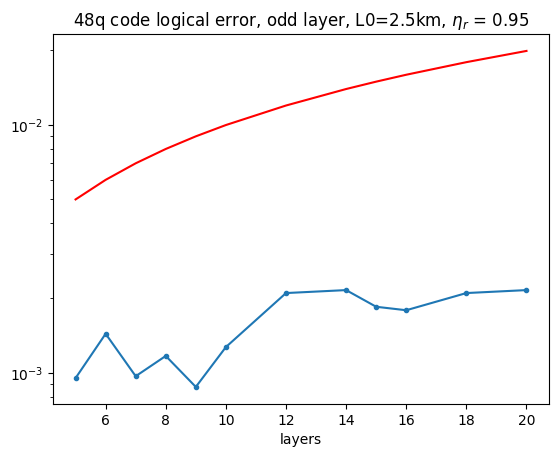

In [171]:
plt.plot(Nl_list, 1-np.array(log_err),'.-')
#print
plt.plot(Nl_list, 1 - (1-0.001) ** np.array(Nl_list),'r-')
#plt.ylim([1e-5, 0.1])
plt.yscale("log")
plt.xlabel('layers')
plt.title('48q code logical error, odd layer, L0=2.5km, $\eta_r$ = 0.95')
#plt.savefig("48qlogicalerrorVSlayers_odd.pdf")

# 48q draft plot

In [360]:
repeat = 1000
#Nl_list = [5,6,7,8,9,10,12,14,15,16,18,20]
#Nl_list = [2,4,6,8,10,12,14,16,18,30,40]
Nl_list = [4,6,8,10,12,14,16,18,30,40]
#N_sample_tot = [1000000, 1000000, 280000,280000,200000,200000,200000,192000,100000,100000,71600]
N_sample_tot = [1000000, 280000,280000,200000,200000,200000,192000,100000,100000,71600]
log_err = []
log_err_err = []
p_r = 0.05
for i in range(len(Nl_list)):
    Nl = Nl_list[i]
    #f2 = "pauli/7q_layers/" + "even_Nl_%d" % (Nl)
    f2 = "pauli/48q_1/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    #f2 = "pauli/48q_1/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_X, p_list, Ntot = file_reader_48q(f2,repeat)
    print(1-sum((succ_prob_X*Ntot)[0,:])/sum(Ntot))
    #print(Ntot)
    #print(sum(Ntot))
    log_err1 = sum((succ_prob_X*Ntot)[0,:])/sum(Ntot)
    log_err.append(log_err1)
    log_err_err1 = np.sqrt(log_err1*(1-log_err1)/N_sample_tot[i])
    log_err_err.append(log_err_err1)
    #print(log_err_err1)

0.0011138400348170707
0.0012174727884413095
0.0013288102980416605
0.0015402952232511646
0.0016436689157369733
0.0016478515416622486
0.0019166602605241723
0.0021088605484704814
0.0026891983588054336
0.003385857533533043


In [357]:
m,b = np.polyfit(Nl_list, np.log(np.array(log_err)), 1)
print(m,b)

-6.293604367191719e-05 -0.0008668199035974078


In [350]:
#Nl_list1 = [6,8,10,12,14,16,18,100,200,500,1000]
Nl_list1 = np.arange(4,1000,0.2)


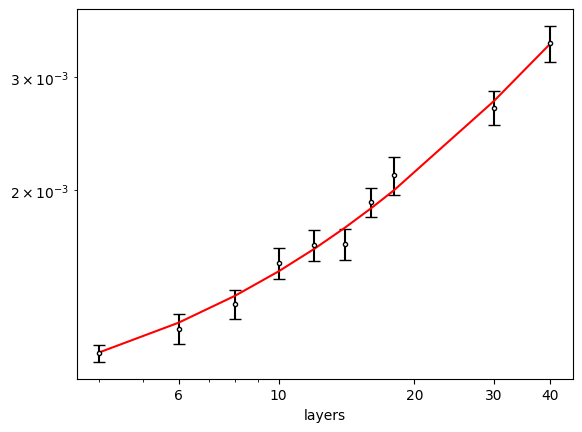

In [352]:
p_pauli = 0.001
#plt.plot(Nl_list, 1-np.array(log_err),'.-')
#plt.errorbar(Nl_list, 1-np.array(log_err), yerr = log_err_err)
plt.errorbar(Nl_list, 1-np.array(log_err), yerr = log_err_err, color = 'k', markerfacecolor='white',marker='.',markersize=markersize_value,linestyle='none',capsize=4)
plt.plot(Nl_list, 1-np.exp(m*np.array(Nl_list) + b), 'r-')
#plt.plot(Nl_list1, 1-np.exp(m*np.array(Nl_list1) + b), 'k--')
#np.sqrt(p_pauli*(1-p_pauli)/np.array(Nl_list))
#plt.plot(Nl_list, 1 - (1-0.001) ** np.array(Nl_list),'.-')
#plt.ylim([1e-5, 0.1])
plt.yscale("log")
plt.xscale("log")
plt.xlabel('layers')
xtick = [6,10,20,30,40]
xtick_labels=['6','10','20','30','40']
plt.xticks(xtick, xtick_labels)
#plt.title('48q code logical error, odd layer, L0=2.5km, $\eta_r$ = 0.95')
#plt.savefig("48qlogicalerrorVSlayers_odd4.pdf")
plt.savefig("48qlogicalerrorVSlayers_odd_3040_draft.pdf")
plt.show()

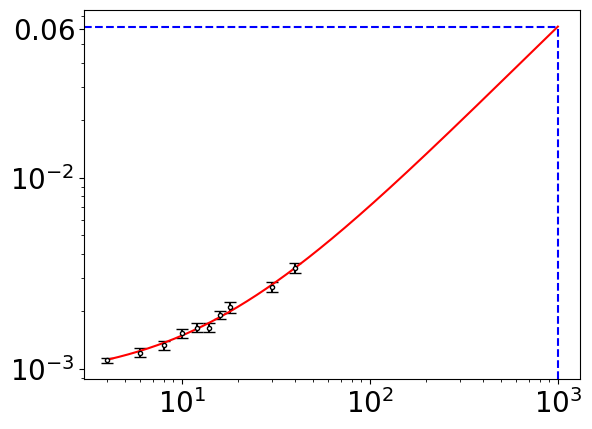

In [355]:
p_pauli = 0.001
#fig = plt.figure(figsize = (fig_width, fig_height))
plt.errorbar(Nl_list, 1-np.array(log_err), yerr = log_err_err, color = 'k', markerfacecolor='white',marker='.',markersize=markersize_value,linestyle='none',capsize=4)
plt.plot(Nl_list1, 1-np.exp(m*np.array(Nl_list1) + b), 'r')
plt.axhline(y = 0.06181006728957961, xmin = 0, xmax = 0.95, color = 'b', linestyle = '--')
plt.axvline(x = 1000, ymin = 0, ymax = 0.95, color = 'b', linestyle = '--')
#plt.axhline(y = 0.06181006728957961, color = 'b', linestyle = '-')
#np.sqrt(p_pauli*(1-p_pauli)/np.array(Nl_list))
#plt.plot(Nl_list, 1 - (1-0.001) ** np.array(Nl_list),'.-')
#plt.ylim([1e-5, 0.1])
#xtick = [0.1,0.15,0.2,0.25,0.3]
#xtick_labels = ['0.1','','0.2','','0.3']
#plt.xticks(xtick, xtick_labels)
#ytick = [1e-6,1e-5,1e-4,1e-3,1e-2,6e-1,1e0]
#ytick_labels = ['$10^{-6}$','','$10^{-4}$','','$10^{-2}$','','$10^0$']
ytick = [6e-2,0.01,0.001]
ytick_labels=['$0.06$','$10^{-2}$','$10^{-3}$']
#plt.xticks(xtick, xtick_labels)
plt.yscale("log")
plt.yticks(ytick, ytick_labels)

plt.xscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel('layers')
#plt.title('48q code logical error, odd layer, L0=2.5km, $\eta_r$ = 0.95')
#plt.savefig("48qlogicalerrorVSlayers_odd4.pdf")

#plt.tight_layout()
#plt.gcf().subplots_adjust(bottom=0.2)
#plt.gcf().subplots_adjust(left=0.2)
plt.savefig("48qlogicalerrorVSlayers_odd_3040_inset_draft.pdf")
plt.show()

In [358]:
1-np.exp(m*2000 + b)

0.11903634420181819

In [153]:
# no loss:
repeat = 20
#Nl_list = [5,6,7,8,9,10,12,14,15,16,18,20]
Nl_list = [10,12,14,16,18,20]
log_err = []
p_r = 0.00
for Nl in Nl_list:
    #f2 = "pauli/7q_layers/" + "even_Nl_%d" % (Nl)
    
    f2 = "pauli/48q_noloss/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_X, p_list, Ntot = file_reader_48q(f2,repeat)
    print(succ_prob_X)
    print(sum((succ_prob_X*Ntot)[0,:])/sum(Ntot))
    log_err.append(sum((succ_prob_X*Ntot)[0,:])/sum(Ntot))


[[1. 1. 1. 1. 1. 1.]]
1.0
[[1. 1. 1. 1. 1. 1.]]
1.0
[[1. 1. 1. 1. 1. 1.]]
1.0
[[1. 1. 1. 1. 1. 1.]]
1.0
[[1. 1. 1. 1. 1. 1.]]
1.0
[[1. 1. 1. 1. 1. 1.]]
1.0


Text(0.5, 1.0, '48q code logical error, odd layer,no loss, $\\eta_r$ = 1')

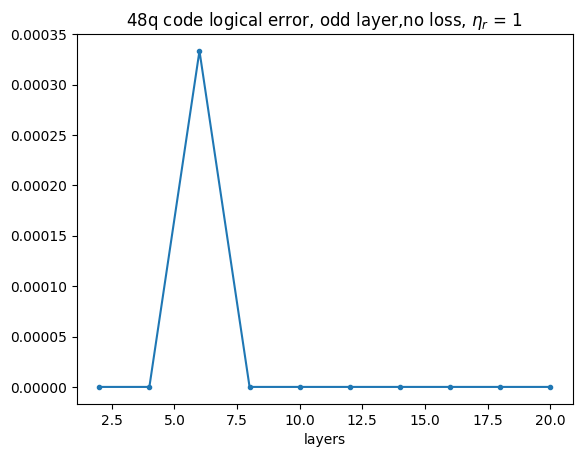

In [135]:
plt.plot(Nl_list, 1-np.array(log_err),'.-')
#plt.ylim([0.0,0.006])
#plt.yscale("log")
plt.xlabel('layers')
plt.title('48q code logical error, odd layer,no loss, $\eta_r$ = 1')
#plt.savefig("48qlogicalerrorVSlayers_odd.pdf")

[[1. 1. 1. 1. 1. 1.]]
1.0
[[1.    1.    1.    1.    1.    0.999]]
0.9998333333333334
[[1. 1. 1. 1. 1. 1.]]
1.0
[[1. 1. 1. 1. 1. 1.]]
1.0


Text(0.5, 1.0, '48q code logical error, odd layer,no loss, $\\eta_r$ = 1')

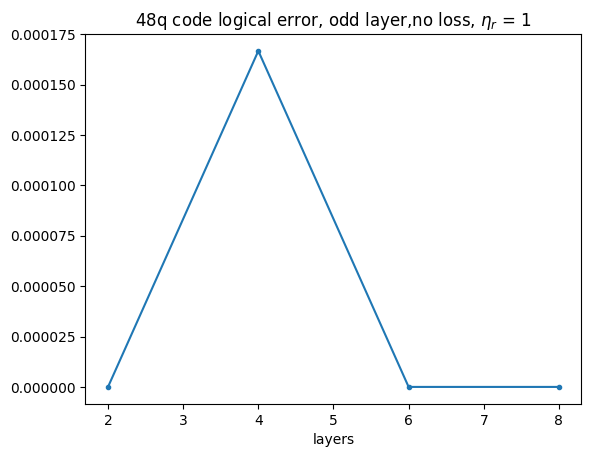

In [136]:
# no loss:
repeat = 20
#Nl_list = [5,6,7,8,9,10,12,14,15,16,18,20]
Nl_list = [2,4,6,8]
log_err = []
p_r = 0.00
for Nl in Nl_list:
    #f2 = "pauli/7q_layers/" + "even_Nl_%d" % (Nl)
    
    f2 = "pauli/48q_noloss1/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_X, p_list, Ntot = file_reader_48q(f2,repeat)
    print(succ_prob_X)
    print(sum((succ_prob_X*Ntot)[0,:])/sum(Ntot))
    log_err.append(sum((succ_prob_X*Ntot)[0,:])/sum(Ntot))

plt.plot(Nl_list, 1-np.array(log_err),'.-')
#plt.ylim([0.0,0.006])
#plt.yscale("log")
plt.xlabel('layers')
plt.title('48q code logical error, odd layer,no loss, $\eta_r$ = 1')